# import libraries


In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import csv
import pickle
import re

# Import Data

In [2]:
main_path = os.getcwd().replace('AIModels','')+'dataset/localization/'
data = []
state=True
for i in ['5dataset_train.pkl']:#sorted(os.listdir(main_path), key=lambda x: int(re.match(r'(\d+)', x).group())):#
    if 'train' in i:
        if state:
            test_path = main_path+i.replace('train', 'test')
            X_test = pd.read_pickle(test_path)
            X_test = X_test.loc[X_test[0]>0,:].reset_index()
            num_samples = len(X_test)
            random_indices = np.random.choice(num_samples, size=int(0.05 * num_samples), replace=False)
            X_test = X_test.loc[random_indices]
            y_test = X_test.loc[:,0]-1
            X_test = X_test.drop(columns=0)
            state = False

        print(i)
        X_train = pd.read_pickle(main_path+i)
        X_train = X_train.loc[X_train[0]>0,:].reset_index()
        
        y_train = X_train.loc[:,0]-1
        
        X_train = X_train.drop(columns=0)

        estimators = [#DecisionTreeClassifier(),
                        RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), 
                        #make_pipeline(StandardScaler(), SVC(C=0.7)),
                        #SGDClassifier(loss="log", penalty="l1", max_iter=25),
                        #GaussianNB(),
                        #KNeighborsClassifier(n_neighbors=28),
                        #GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=0),
                        #MLPClassifier(max_iter= 100),
                        #AdaBoostClassifier(n_estimators=100, random_state=0),
                        #QuadraticDiscriminantAnalysis()
                        ]
        #main loop
        for i in range(0,len(estimators)): 
            ##make_pipeline
            pipe = make_pipeline(estimators[i])
            print(pipe.steps[0])
            
            ##training
            start_time = time.time()
            pipe.fit(X=X_train, y=y_train)
            end_time = time.time()
            training_time = (end_time-start_time)
            print('trainig time (sec): ', training_time)
            
            ##predition on test data
            start_time = time.time()
            y_pred = pipe.predict(X_test)
            end_time = time.time()
            prediction_time = (end_time-start_time)*10e3/y_test.shape[0]
            print('prediction time (ms): ', prediction_time)

            ##metrics
            balanced_accuracy_score = metrics.balanced_accuracy_score(y_test, y_pred)
            accuracy = metrics.accuracy_score(y_test, y_pred)
            percision = metrics.precision_score(y_test, y_pred, average=None)
            f1_score = metrics.f1_score(y_test, y_pred, average=None)
            recall= metrics.recall_score(y_test, y_pred, average=None)

            print('Balanced accuracy on source domain data: ', balanced_accuracy_score)
            
            ##write to csv
            data.append([pipe.steps[0][0], training_time, prediction_time, balanced_accuracy_score, accuracy, percision, f1_score, recall])
            #csv_writer.writerow(data)
            print(metrics.confusion_matrix(y_pred=y_pred, y_true=y_test))

        #close the csv file
        #file.close()

5dataset_train.pkl
('randomforestclassifier', RandomForestClassifier(n_jobs=-1, random_state=0))
trainig time (sec):  3.4936647415161133
prediction time (ms):  1.9832098925555195
Balanced accuracy on source domain data:  0.9309525284736669
[[ 17   2   0   0   0   0   0]
 [  0  52   1   0   1   0   0]
 [  0   1  39   1   0   0   0]
 [  0   0   2  71   1   2   0]
 [  0   0   1   6 111   7   0]
 [  0   0   0   1   2 148   0]
 [  0   0   0   0   0   7  67]]


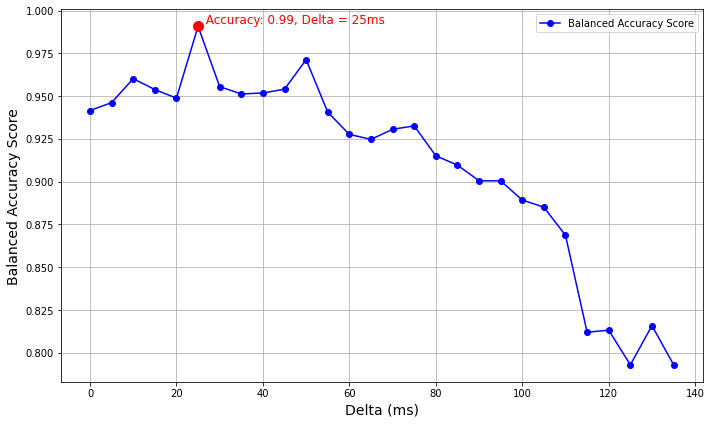

In [41]:
import matplotlib.pyplot as plt

# Assuming data is a list of lists where balanced_accuracy_score is the 3rd element in each row
balanced_accuracy_scores = [row[3] for row in data]

# Get the row positions (indices) for the x-axis and multiply each by 5
row_positions = [(i) * 5 for i in range(len(data))]

# Find the maximum value and its position
max_value = max(balanced_accuracy_scores)
max_index = balanced_accuracy_scores.index(max_value)
max_row_position = row_positions[max_index]

# Plot the line chart
plt.figure(figsize=(10, 6))  # High-quality figure size
plt.plot(row_positions, balanced_accuracy_scores, label='Balanced Accuracy Score', color='blue', marker='o')

# Highlight the max value
plt.scatter(max_row_position, max_value, color='red', s=100, zorder=5)  # Highlight max point with red
plt.text(max_row_position, max_value, f'  Accuracy: {max_value:.2f}, Delta = {max_row_position}ms', fontsize=12, ha='left', va='bottom', color='red')

# Labeling the chart
plt.xlabel('Delta (ms)', fontsize=14)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.legend()

# Improve layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# test on target robot


In [5]:
main_path = os.getcwd().replace('AIModels','')

data_path = main_path + 'dataset/test_dataset_source_robot/dataset_test.pkl'

X = pd.read_pickle(data_path)
if 0 in X[0].unique():
    X = X.loc[X[0]>0,:].reset_index()
    y = X.loc[:,0]-1
else:
    y = X.loc[:,0]



X = X.drop(columns=[0])

##predition on test data
start_time = time.time()
y_p = pipe.predict(X)
end_time = time.time()
prediction_time = (end_time-start_time)*10e3/y.shape[0]
print('prediction time (ms): ', prediction_time)

##metrics
balanced_accuracy_score = metrics.balanced_accuracy_score(y, y_p)
accuracy = metrics.accuracy_score(y, y_p)
percision = metrics.precision_score(y, y_p, average=None)
f1_score = metrics.f1_score(y, y_p, average=None)
recall= metrics.recall_score(y, y_p, average=None)

print('Balanced accuracy on source domain data: ', balanced_accuracy_score)
print(metrics.confusion_matrix(y_true=y, y_pred=y_p))

prediction time (ms):  3.5346046326652405
Balanced accuracy on source domain data:  0.9407407407407408
[[  0   0   0   0   0   0]
 [  2 125   4   0   2   2]
 [  0   4 172   3   0   1]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


/home/rzma/miniconda3/envs/franka/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/rzma/miniconda3/envs/franka/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# test with LSTM model

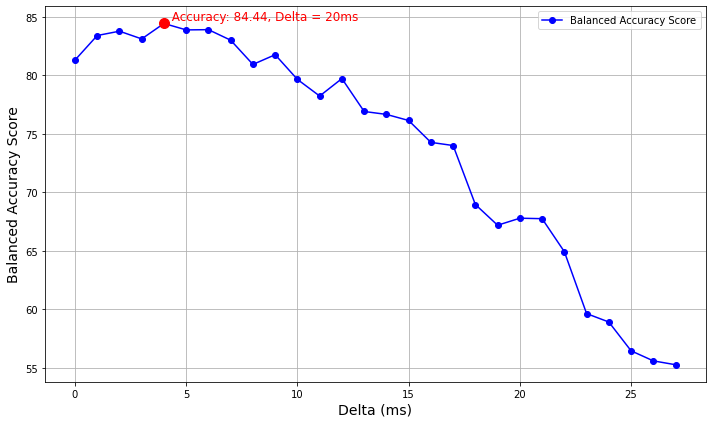

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('AI_result/dataset_test_result.csv')

# Extract the balanced accuracy scores
balanced_accuracy_scores = df.test_on_0_dataset

# Find the maximum value and its corresponding position
max_value = balanced_accuracy_scores.max()
max_row_position = balanced_accuracy_scores.idxmax()

# Plot the line chart
plt.figure(figsize=(10, 6))  # High-quality figure size
plt.plot(balanced_accuracy_scores.index, balanced_accuracy_scores, label='Balanced Accuracy Score', color='blue', marker='o')

# Highlight the max value
plt.scatter(max_row_position, max_value, color='red', s=100, zorder=5)  # Highlight max point with red
plt.text(max_row_position, max_value, f'  Accuracy: {max_value:.2f}, Delta = {max_row_position*5}ms', fontsize=12, ha='left', va='bottom', color='red')

# Labeling the chart
plt.xlabel('Delta (ms)', fontsize=14)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.legend()

# Improve layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
